## 使用相机标定的参数对畸变图像进行校正

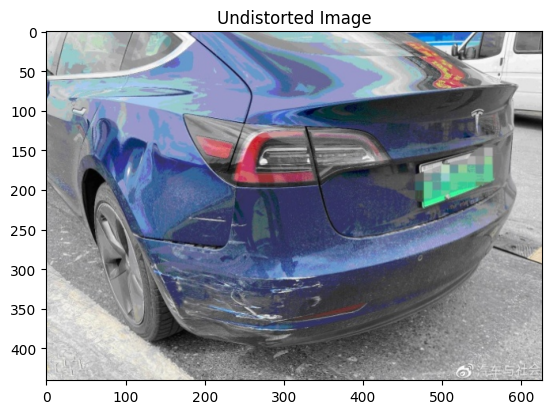

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img = cv2.imread('car.jpg')

# 读取相机矩阵和畸变系数
camera_matrix = np.array([[822.41557991, 0, 321.98439837],
                          [0, 822.15932859, 237.94729242],
                          [0, 0, 1]])
distortion_coefficients = np.array([0.0564451053, -0.0187491584, -0.00269532797, 0.000518462008, 1.92372594])

# 畸变校正
h, w = img.shape[:2]
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion_coefficients, (w, h), 1, (w, h))

# 应用畸变校正
undistorted_img = cv2.undistort(img, camera_matrix, distortion_coefficients, None, new_camera_matrix)

# 裁剪图片
x, y, w, h = roi
undistorted_img = undistorted_img[y:y+h, x:x+w]

# 显示校正结果
plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
plt.title('Undistorted Image')
plt.show()

In [2]:
# 保存校正后的图像
cv2.imwrite('car_undistorted.jpg', undistorted_img)

True